In [2]:
import os 
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
import pandas as pd
import numpy as np
import math
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
if os.name =='nt' :
    font_family= 'Malgun Gothic'
sns.set(font=font_family, rc= {'axes.unicode_minus': False})

In [3]:
#데이터 셋 
a = [66,74,82,75,73,97,87,78]
b = [72,51,59,62,74,64,78,63]
c = [61,60,57,60,81,77,70,71]
d = [63,61,76,84,58,65,69,80]
print("a 평균 :", np.mean(a))
print("b 평균 :", np.mean(b))
print("c 평균 :", np.mean(c))
print("d 평균 :", np.mean(d))

a 평균 : 79.0
b 평균 : 65.375
c 평균 : 67.125
d 평균 : 69.5


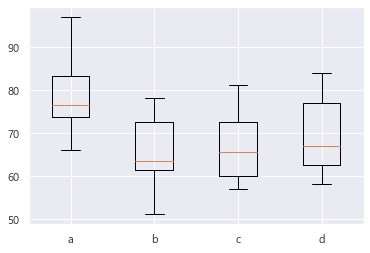

In [4]:
#이상값 확인
plot_data = [a, b, c, d]
plt.boxplot(plot_data)
plt.xticks([1, 2, 3, 4], ['a', 'b', 'c', 'd'])
plt.grid(True)
plt.show()

In [5]:
#데이터프레임 변환
check = ['a', 'b', 'c', 'd']
check = [check[j] for j in range(4) for i in range(8)]
data = pd.DataFrame({'점수':a+b+c+d, '교육기관':check})
data.head(4)

,점수,교육기관
0,66,a
1,74,a
2,82,a
3,75,a


In [6]:
print(stats.ks_2samp(a, b), stats.ks_2samp(a, c), stats.ks_2samp(a, d),
      stats.ks_2samp(b, c), stats.ks_2samp(b, d),
      stats.ks_2samp(c, d), sep="\n")
#등분산성 검정 : 모든 집단의 모분산은 동일함
print('등분산성 검정')
from scipy.stats import levene
print(levene(a, b, c, d))

from scipy.stats import bartlett
print(bartlett(a, b, c, d))

KstestResult(statistic=0.625, pvalue=0.08702408702408701)
KstestResult(statistic=0.625, pvalue=0.08702408702408701)
KstestResult(statistic=0.5, pvalue=0.2826728826728826)
KstestResult(statistic=0.25, pvalue=0.98010878010878)
KstestResult(statistic=0.25, pvalue=0.98010878010878)
KstestResult(statistic=0.25, pvalue=0.98010878010878)
등분산성 검정
LeveneResult(statistic=0.07560756075607561, pvalue=0.972627101462453)
BartlettResult(statistic=0.07373983712569482, pvalue=0.9947906337756077)


In [7]:
#F통계량을 이용한 가설 검정
f_statistic, pval = stats.f_oneway(a, b, c, d)
print('F=(0:.1f), p={1:.3f}'.format(f_statistic, pval))

if pval < 0.05 :
    print("귀무가설 기각, 4개의 교육훈련 기법간이 차이가 있다.")
else :
    print("귀무가설 채택, 4개의 교육훈련 기법간이 차이가 없다.")

F=(0:.1f), p=0.029
귀무가설 기각, 4개의 교육훈련 기법간이 차이가 있다.


In [8]:
#Statsmodel을 사용한 일원분산분석
from statsmodels. formula.api import ols
from statsmodels. stats.anova import anova_lm

In [59]:
model_1A = ols('점수 ~C(교육기관)', data).fit()
anova_lm_result = anova_lm(model_1A)
anova_lm_result

,df,sum_sq,mean_sq,F,PR(>F)
C(교육기관),3.0,885.25,295.083333,3.482176,0.028897
Residual,28.0,2372.75,84.741071,NaN,NaN


In [60]:
#사후분석
from statsmodels.stats.multicomp import pairwise_tukeyhsd

HSD = pairwise_tukeyhsd(data['점수'], data['교육기관'], alpha = 0.05)
HSD.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
a,b,-13.625,0.0298,-26.1919,-1.0581,True
a,c,-11.875,0.0692,-24.4419,0.6919,False
a,d,-9.5,0.1896,-22.0669,3.0669,False
b,c,1.75,0.9809,-10.8169,14.3169,False
b,d,4.125,0.8068,-8.4419,16.6919,False
c,d,2.375,0.9546,-10.1919,14.9419,False


In [61]:
#종속변수
dat = pd.DataFrame({'판유리':['유리1', '유리1', '유리1', '유리2', '유리2',
                           '유리2', '유리3', '유리3', '유리3', '유리1',
                           '유리1', '유리1', '유리2', '유리2', '유리2',
                           '유리3', '유리3', '유리3', '유리1', '유리1',
                           '유리1', '유리2', '유리2', '유리2', '유리3',
                           '유리3', '유리3'],
                    '온도' : [100, 100, 100, 100, 100, 100, 100, 100, 100,
                            125, 125, 125, 125, 125, 125, 125, 125, 125,
                            150, 150, 150, 150, 150, 150, 150, 150, 150],
                    '강도' : [500, 568, 570, 550, 530, 579, 546, 575, 599,
                            1000, 1087, 1085, 1070, 1035, 1000, 1045, 1053,
                            1066, 1392, 1380, 1386, 1328, 1312, 1299, 867,
                            984, 889]})

In [62]:
dat.head()

,판유리,온도,강도
0,유리1,100,500
1,유리1,100,568
2,유리1,100,570
3,유리2,100,550
4,유리2,100,530


In [63]:
dat.groupby(['판유리', '온도']).agg(len)

강도
판유리 온도     
유리1 100   3
    125   3
    150   3
유리2 100   3
    125   3
    150   3
유리3 100   3
    125   3
    150   3

In [64]:
#이원분산분석
from statsmodels. formula.api import ols
from statsmodels. stats.anova import anova_lm

model = ols('강도 ~ C(판유리) * C(온도)', dat).fit()
anova_result = pd.DataFrame(anova_lm(model))
anova_result

,df,sum_sq,mean_sq,F,PR(>F)
C(판유리),2.0,1.126223e+05,5.631115e+04,46.855096,7.321792e-08
C(온도),2.0,2.051592e+06,1.025796e+06,853.539277,1.466131e-18
C(판유리):C(온도),4.0,2.779561e+05,6.948904e+04,57.820087,4.989739e-10
Residual,18.0,2.163267e+04,1.201815e+03,NaN,NaN


In [65]:
dat['온도'] = dat['온도'].astype('str')
dat['combi'] = dat.판유리 + "/" + dat.온도
print(pairwise_tukeyhsd(dat['강도'], dat['combi']))

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1  group2  meandiff p-adj    lower     upper   reject
-----------------------------------------------------------
유리1/100 유리1/125  511.3333    0.0  412.1542  610.5124   True
유리1/100 유리1/150     840.0    0.0  740.8209  939.1791   True
유리1/100 유리2/100       7.0    1.0  -92.1791  106.1791  False
유리1/100 유리2/125     489.0    0.0  389.8209  588.1791   True
유리1/100 유리2/150     767.0    0.0  667.8209  866.1791   True
유리1/100 유리3/100   27.3333 0.9846  -71.8458  126.5124  False
유리1/100 유리3/125  508.6667    0.0  409.4876  607.8458   True
유리1/100 유리3/150  367.3333    0.0  268.1542  466.5124   True
유리1/125 유리1/150  328.6667    0.0  229.4876  427.8458   True
유리1/125 유리2/100 -504.3333    0.0 -603.5124 -405.1542   True
유리1/125 유리2/125  -22.3333 0.9958 -121.5124   76.8458  False
유리1/125 유리2/150  255.6667    0.0  156.4876  354.8458   True
유리1/125 유리3/100    -484.0    0.0 -583.1791 -384.8209   True
유리1/125 유리3/125   -2.6667    1.0 -101.84